In [ ]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using all 2000 genes to plot cell velocity

In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [2]:
not_combined_detail=False

if not_combined_detail:
    # load raw
    raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
    load_raw_data = pd.read_csv(raw_data_path)

    # combine detail
    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth'
    path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binTrue/detail_e200.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)
    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()
    
    
    load_cellDancer['clusters']=load_raw_data['clusters']
    load_cellDancer['cellID']=load_raw_data['cellID']
    load_cellDancer['embedding1']=load_raw_data['embedding1']
    load_cellDancer['embedding2']=load_raw_data['embedding2']
    load_cellDancer
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv',index=False)

else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/combined_detail/combined_detail.csv')
# define output path
#output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'

In [9]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880


In [10]:
cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/pseudotime/cell_time_Gastrulation_pz0330.csv')

In [12]:
cell_time_time_sort=cell_time.sort_values('time')

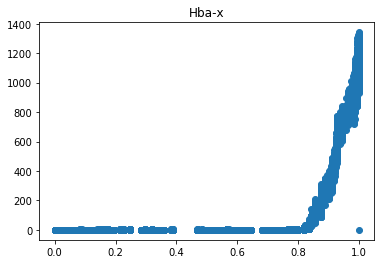

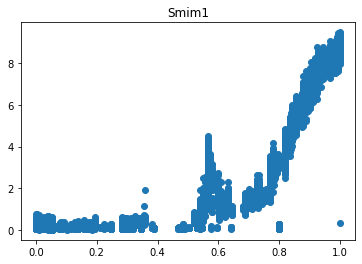

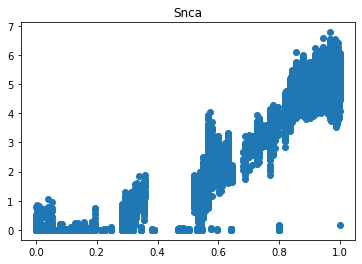

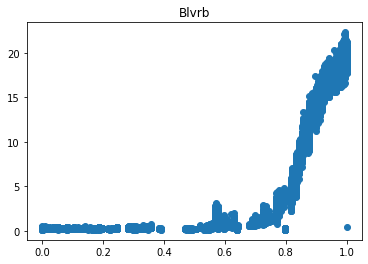

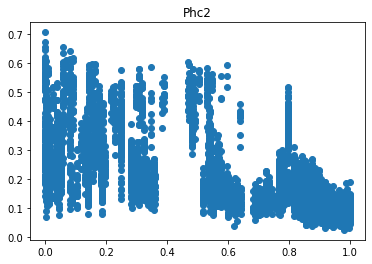

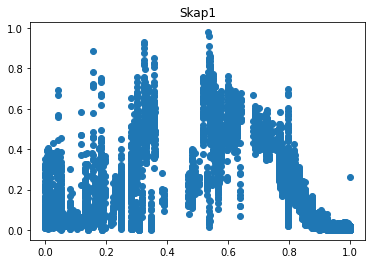

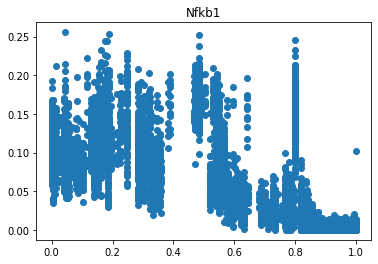

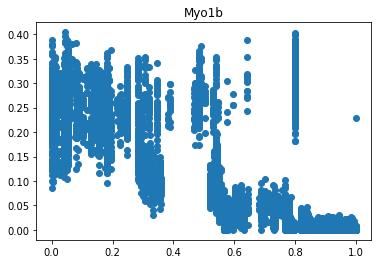

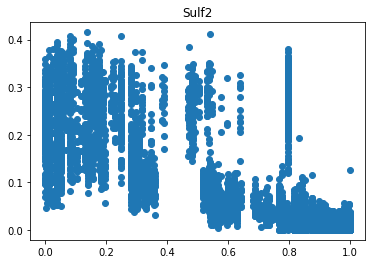

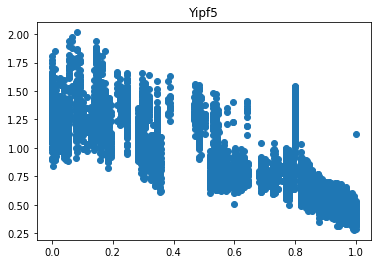

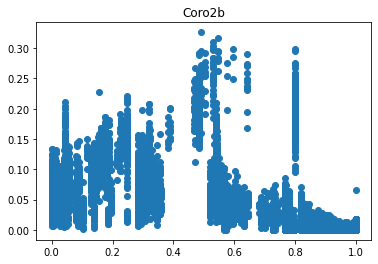

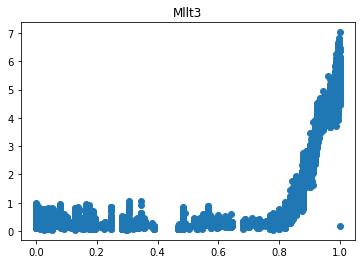

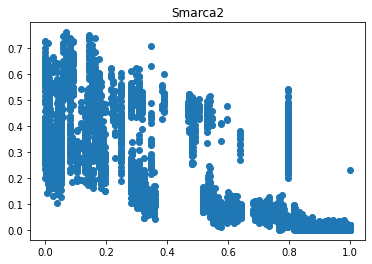

In [44]:
def gene_pseudotime(gene,load_cellDancer):

    plt.figure()
    onegene=load_cellDancer[load_cellDancer.gene_name==gene]
    merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex')
    plt.title(gene)
    ax=plt.scatter(merged.time,merged.s1)

    return(ax)

def gene_list_pseudotime(gene_list,load_cellDancer):
    for gene in gene_list:
        gene_pseudotime(gene,load_cellDancer)

gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
gene_list_pseudotime(gene_list,load_cellDancer)